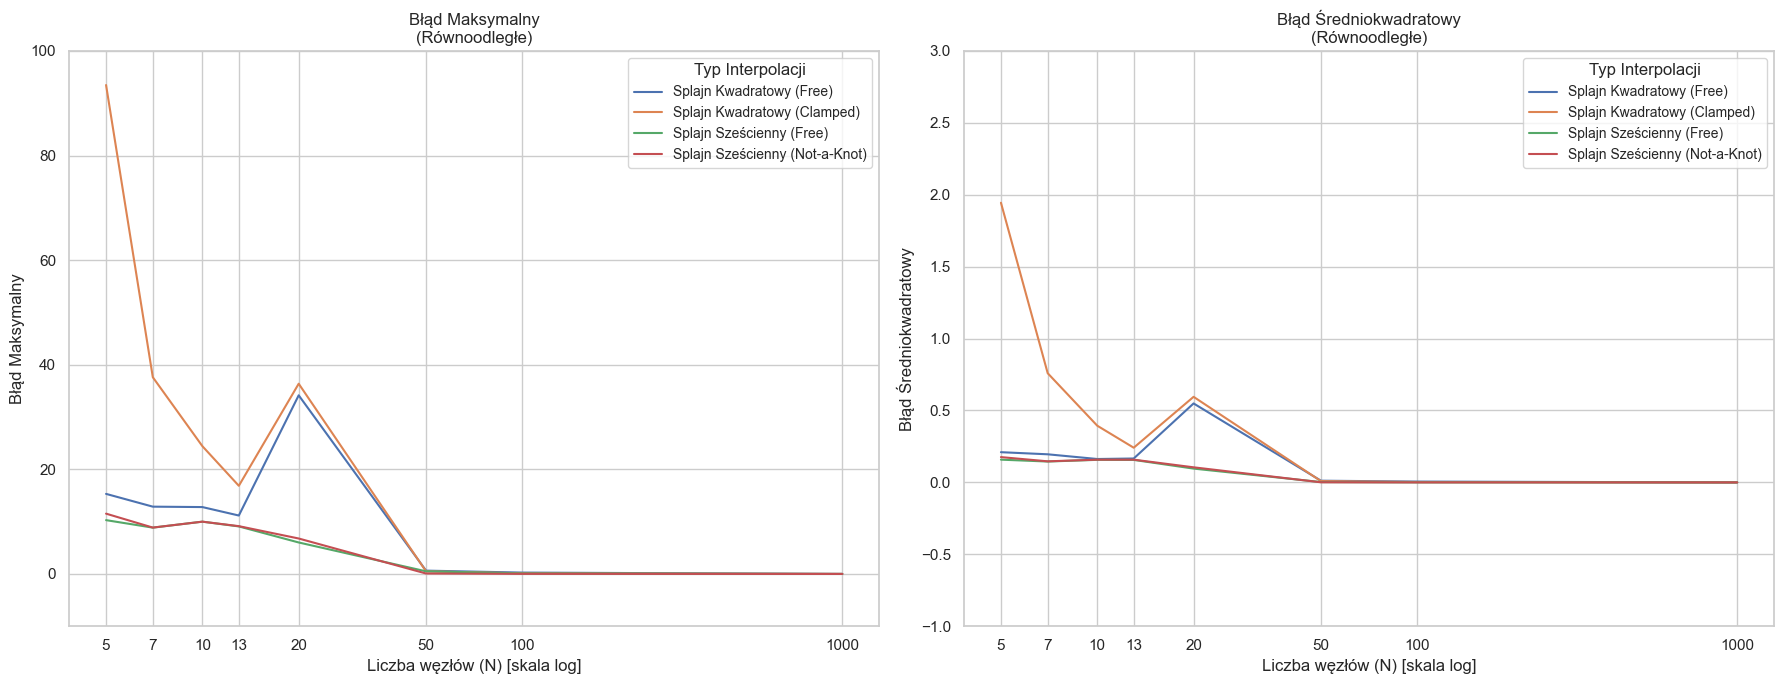

Wykresy błędów zapisane w: ./wykresy_bledow\wykres_bledow_Równoodległe.png


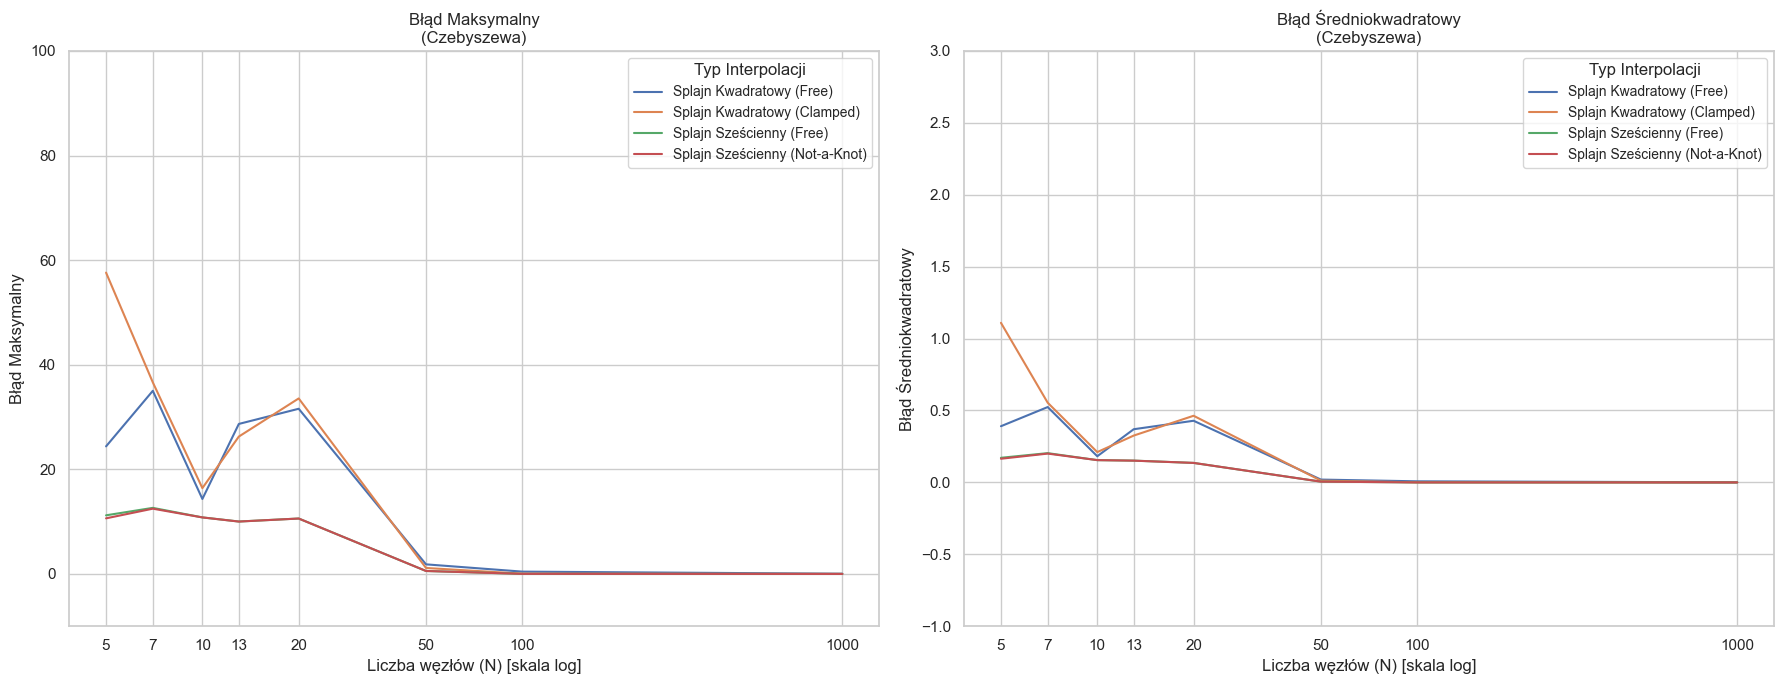

Wykresy błędów zapisane w: ./wykresy_bledow\wykres_bledow_Czebyszewa.png


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

file_path = (
    ".\\data_splines_only_with_clamped\\spline_interpolation_errors_with_clamped.csv"
)
df = pd.read_csv(file_path)

df.rename(
    columns={
        "Liczba Węzłów": "N",
        "Typ Węzłów": "Node Type",
        "Typ Interpolacji": "Interpolation Type",
        "Błąd Maksymalny": "Błąd Maksymalny",
        "Błąd Średniokwadratowy": "Błąd Średniokwadratowy",
    },
    inplace=True,
)

df["N"] = df["N"].astype(int)

sns.set(style="whitegrid")

df_uniform = df[df["Node Type"] == "Równoodległe"]
df_cheb = df[df["Node Type"] == "Czebyszewa"]

error_metrics = ["Błąd Maksymalny", "Błąd Średniokwadratowy"]

output_folder = "./wykresy_bledow"
os.makedirs(output_folder, exist_ok=True)


def plot_errors_for_node_type(df_node, node_label):
    # 2 columns plots
    fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=False)

    for idx, metric in enumerate(error_metrics):
        ax = axes[idx]
        sns.lineplot(
            data=df_node,
            x="N",
            y=metric,
            hue="Interpolation Type",
            markers=True,
            dashes=False,
            ax=ax,
        )
        # log scale x setting up
        ax.set_xscale("log")
        unique_n = sorted(df_node["N"].unique())
        ax.set_xticks(unique_n)
        ax.set_xticklabels([str(x) for x in unique_n])

        # title and legend config
        ax.set_title(f"{metric}\n({node_label})")
        ax.set_xlabel("Liczba węzłów (N) [skala log]")
        ax.set_ylabel(metric)
        ax.legend(title="Typ Interpolacji", fontsize="small")
        if idx == 0:
            ax.set_ylim(-10, 100)
        else:
            ax.set_ylim(-1, 3)

    plt.tight_layout()

    output_path = os.path.join(output_folder, f"wykres_bledow_{node_label}.png")
    plt.savefig(output_path)
    plt.show()
    print(f"Wykresy błędów zapisane w: {output_path}")


plot_errors_for_node_type(df_uniform, "Równoodległe")
plot_errors_for_node_type(df_cheb, "Czebyszewa")